<a href="https://colab.research.google.com/github/DineshSiddhartha/SRIP/blob/main/SRIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/Copy_of_image_chips_native-20250212T103727Z-001.zip

Archive:  /content/drive/MyDrive/Copy_of_image_chips_native-20250212T103727Z-001.zip
  inflating: image_chips_native/solarpanels_native_2__x0_8521_y0_3953_dxdy_416.tif  
  inflating: image_chips_native/solarpanels_native_1__x0_0_y0_7513_dxdy_416.tif  
  inflating: image_chips_native/solarpanels_native_1__x0_5472_y0_12892_dxdy_416.tif  
  inflating: image_chips_native/solarpanels_native_2__x0_2781_y0_5085_dxdy_416.tif  
  inflating: image_chips_native/solarpanels_native_3__x0_615_y0_6709_dxdy_416.tif  
  inflating: image_chips_native/solarpanels_native_1__x0_5472_y0_12892_dxdy_416(1).tif  
  inflating: image_chips_native/solarpanels_native_3__x0_10395_y0_10287_dxdy_416.tif  
  inflating: image_chips_native/solarpanels_native_1__x0_9303_y0_11851_dxdy_416.tif  
  inflating: image_chips_native/solarpanels_native_2__x0_8660_y0_3993_dxdy_416.tif  
  inflating: image_chips_native/solarpanels_native_2__x0_8943_y0_4161_dxdy_416.tif  
  inflating: image_chips_native/solarpanels_native_3__x0_9432

In [3]:
!unzip /content/drive/MyDrive/Copy_of_labels-20250212T103318Z-001.zip

Streaming output truncated to the last 5000 lines.
  inflating: labels/labels_hd/solarpanels_hd_3__x0_15395_y0_25944_dxdy_832.txt  
  inflating: labels/labels_hd/solarpanels_hd_3__x0_15641_y0_2228_dxdy_832.txt  
  inflating: labels/labels_hd/solarpanels_hd_2__x0_17159_y0_8199_dxdy_832.txt  
  inflating: labels/labels_hd/solarpanels_hd_1__x0_8985_y0_23459_dxdy_832(1).txt  
  inflating: labels/labels_hd/solarpanels_hd_2__x0_7109_y0_25732_dxdy_832.txt  
  inflating: labels/labels_hd/solarpanels_hd_3__x0_16409_y0_24237_dxdy_832.txt  
  inflating: labels/labels_hd/solarpanels_hd_3__x0_12679_y0_23513_dxdy_832.txt  
  inflating: labels/labels_hd/solarpanels_hd_1__x0_2428_y0_7538_dxdy_832.txt  
  inflating: labels/labels_hd/solarpanels_hd_2__x0_10910_y0_12903_dxdy_832.txt  
  inflating: labels/labels_hd/solarpanels_hd_1__x0_12278_y0_24478_dxdy_832.txt  
  inflating: labels/labels_hd/solarpanels_hd_3__x0_11541_y0_2026_dxdy_832.txt  
  inflating: labels/labels_hd/solarpanels_hd_3__x0_19007_y0_29

Converting all images to jpg files

In [4]:
import os
from PIL import Image

input_folder = "/content/image_chips_native"
image_dir = "/content/image_chips_native_jpg"

os.makedirs(image_dir, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.lower().endswith(".tif") or filename.lower().endswith(".tiff"):
        img_path = os.path.join(input_folder, filename)
        img = Image.open(img_path)
        jpg_filename = os.path.splitext(filename)[0] + ".jpg"
        jpg_path = os.path.join(image_dir, jpg_filename)
        img.convert("RGB").save(jpg_path, "JPEG")

print("Conversion completed!")


Conversion completed!


Removing all unwanted files and mapping labels and images.

In [5]:
import os

# Folder paths
label_native_dir="/content/labels/labels_native"
label_hd_dir="/content/labels/labels_hd"

#Sorting files according to their names
image_files=[]
label_native_files=[]
label_hd_files=[]

for label_path in os.listdir(label_native_dir):
    label_native_files.append(label_path)

for label_path in os.listdir(label_hd_dir):
    if("(1)" in label_path):
      continue
    label_hd_files.append(label_path)

label_native_set=[]
for label_path in label_native_files:
    label_native_set.append(label_path[:-4]) #removing .txt

for img_path in os.listdir(image_dir):
    img_name = img_path[:-4]  # removing .tif
    if img_name in label_native_set:
        image_files.append(img_path) # keeping only images with a valid label
# sorting the files as both folders have files with the same file names
image_files.sort()
label_native_files.sort()
label_hd_files.sort()

In [ ]:
#checking
for i in range(len(image_files)):
  if(image_files[i][:-4]!=label_native_files[i][:-4]):
    print(i)
print(len(image_files))
print(len(label_native_files))
print(len(label_hd_files))

2542
2542
2542


Data Exploration and Understanding
Dataset statistics



Calculate the statistics of the area of solar panels in meters (Read label readme carefully for this question)
What method was used to compute the area (in meters) for a single instance?
What is the mean area and standard deviation?
Plot the histogram of areas. What do you observe?


How many instances of solar panels are present in the dataset?

In [6]:
hd_labels_folder="/content/labels/labels_hd"
native_labels_folder="/content/labels/labels_native"

def count_lines_in_folder(folder_path):
    total_lines = 0
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r") as file:
            total_lines += len(file.readlines())
    return total_lines

hd_labels_lines=count_lines_in_folder(hd_labels_folder)
native_labels_lines=count_lines_in_folder(native_labels_folder)
print("number of hd resolution img solar panels:", hd_labels_lines)
print("number of native resolution img solar panels:", native_labels_lines)
print("total number of solar panels:", native_labels_lines+hd_labels_lines)

number of hd resolution img solar panels: 29880
number of native resolution img solar panels: 29625
total number of solar panels: 59505


Compute and show the value counts of labels per image. E.g., X images have 0 labels, Y images have 1 label, … and so on.


In [ ]:
hd_res_img_tile_counts={}
# counting number of labels
for file_name in os.listdir(hd_labels_folder):
        tile_id=file_name[15]
        hd_res_img_tile_counts[tile_id]=hd_res_img_tile_counts.get(tile_id, 0) + 1

native_res_img_tile_counts={}

for file_name in os.listdir(native_labels_folder):
        tile_id=file_name[19]
        native_res_img_tile_counts[tile_id]=native_res_img_tile_counts.get(tile_id, 0) + 1

print("Labels per HD res img Tile:")
for tile, count in sorted(hd_res_img_tile_counts.items()):
    print("Tile", tile,":",count,"labels")
print("Labels per native res img Tile:")
for tile, count in sorted(native_res_img_tile_counts.items()):
    print("Tile", tile,":",count,"labels")


Labels per HD res img Tile:
Tile 1 : 999 labels
Tile 2 : 638 labels
Tile 3 : 915 labels
Labels per native res img Tile:
Tile 1 : 989 labels
Tile 2 : 638 labels
Tile 3 : 915 labels


Calculate the statistics of the area of solar panels in meters (Read label readme carefully for this question)
What method was used to compute the area (in meters) for a single instance?
What is the mean area and standard deviation?
Plot the histogram of areas. What do you observe?


The area is computed using bounding box dimensions from YOLO format and converting them to meters by scaling them. We obtain the area of each solar panel by scaling the width and height of each bounding box and finding area by multiplying it the width and height.

In [ ]:
import numpy as np

label_files = [label_native_files,label_hd_files]
IMAGE_SIZES = {
    416: 0.31,
    832: 0.155
} # The scaling factor of images as per the resolution
areas = []
for label_file in label_files:
    for file_name in label_file:
            image_size = int(file_name[-7:-4])
            resolution = IMAGE_SIZES[image_size]
            if(image_size==832):
              file_path="/content/labels/labels_hd/"+file_name
            else:
              file_path="/content/labels/labels_native/"+file_name
            with open(file_path, "r") as f:
                for line in f:
                    parts = line.strip().split()
                    x_center, y_center, x_width, y_width = float(parts[1]), float(parts[2]), float(parts[3]), float(parts[4])

                    actual_width_m = x_width * image_size * resolution
                    actual_height_m = y_width * image_size * resolution

                    area_m2 = actual_width_m * actual_height_m
                    areas.append(area_m2)

areas = np.array(areas)
mean_area = np.mean(areas)
std_dev_area = np.std(areas)

print("Total Solar Panels:",len(areas))
print("Mean Area:",mean_area,"m^2")
print("Standard Deviation:",std_dev_area,"m^2")


Total Solar Panels: 59416
Mean Area: 190.0988148895079 m^2
Standard Deviation: 619.6196957841796 m^2


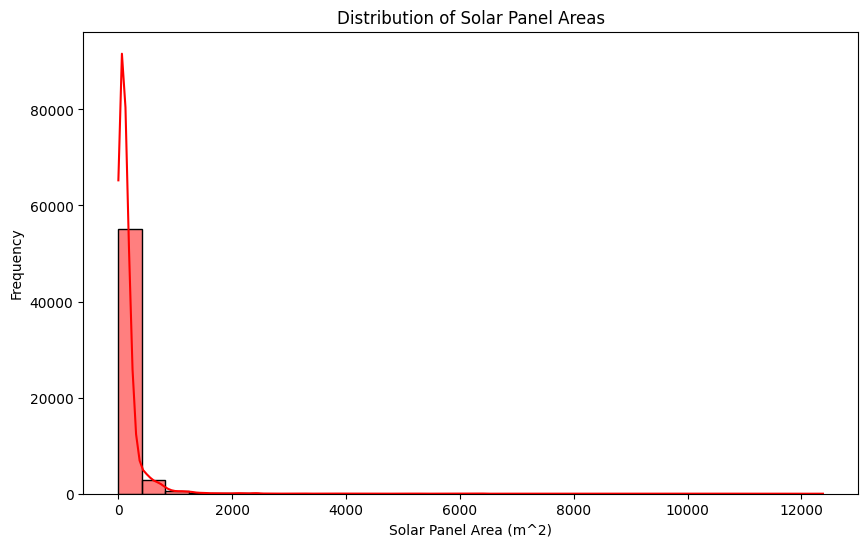

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(areas, bins=30,color='r',kde=True)

plt.xlabel("Solar Panel Area (m^2)")
plt.ylabel("Frequency")
plt.title("Distribution of Solar Panel Areas")
plt.show()

Observations-

Highly Skewed Distribution – Most solar panel areas are very small, clustering near the left side of the plot (closer to 0 m²).

There are very few solar panels with much larger areas, extending beyond 2000 m², possibly even above 10,000 m². A large number of instances have small solar panel areas, leading to a sharp peak at the left end.

In [ ]:
pip install shapely

In [7]:
!pip install supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 3.6 MB/s eta 0:00:00


In [8]:
import shapely
from shapely import intersection
from shapely import union
from shapely.geometry import box
import supervision as sv

def yolo_to_pixel(box):
  x_c,y_c,w,h=box
  x_left=(x_c-w/2)*416
  y_bottom=(y_c-h/2)*416
  x_right=(x_c+w/2)*416
  y_top=(y_c+h/2)*416
  return x_left,y_bottom,x_right,y_top

def bb_intersection_over_union(boxA, boxB):
  boxA=yolo_to_pixel(boxA)
  boxB=yolo_to_pixel(boxB)
  box1=shapely.box(boxA[0],boxA[1],boxA[2],boxA[3])
  box2=shapely.box(boxB[0],boxB[1],boxB[2],boxB[3])
  i=intersection(box1,box2, grid_size=1)
  u=union(box1,box2)
  return shapely.area(i)/shapely.area(u)

In [ ]:
# Example case
boxA=[39, 63, 203, 112]
boxB= [54, 66, 198, 114]

In [ ]:
iou_shapely = bb_intersection_over_union(boxA, boxB)

# Computing IoU using Supervision
box1_np=np.array([yolo_to_pixel(boxA)])
box2_np=np.array([yolo_to_pixel(boxB)])

iou_supervision = sv.box_iou_batch(box1_np, box2_np)[0, 0]

print("IoU (Shapely):",iou_shapely)
print("IoU (Supervision):",iou_supervision)

if (iou_shapely-iou_supervision<1e-4):
    print("IoU values are similar!")

IoU (Shapely): 0.8193791912620969
IoU (Supervision): 0.8193791912620969
IoU values are similar!



Write a function to compute Average Precision (AP)
Use Pascal VOC 11 point interpolation method to implement the function


In [9]:
def Average_Precision_Pascal_VOC_11(recall, precision):
    recall_levels = np.linspace(0, 1, 11)
    max_precision=np.zeros(11)
    for i in range(11):
        r=recall_levels[i]
        max_prec=0
        for j in range(len(recall)):
            if recall[j]>=r:
                if precision[j]>max_prec:
                    max_prec=precision[j]
        max_precision[i]=max_prec

    ap_sum = 0
    for p in max_precision:
        ap_sum+=p
    return ap_sum/len(recall_levels)

Use COCO 101-point interpolation method to implement the function

In [10]:
def Average_Precision_COCO_101(recall, precision):
    recall_levels = np.linspace(0, 1, 101)
    max_precision=np.zeros(101)
    for i in range(101):
        r=recall_levels[i]
        max_prec=0
        for j in range(len(recall)):
            if recall[j]>=r:
                if precision[j]>max_prec:
                    max_prec=precision[j]
        max_precision[i]=max_prec

    ap_sum = 0
    for p in max_precision:
        ap_sum+=p
    return ap_sum/len(recall_levels)

Use Area under Precision-Recall Curve (AP) method to implement the function

In [11]:
def Average_Precision_AUC(recall, precision):
    ap=0
    for i in range(1,len(recall)):
        ap+=(recall[i]-recall[i-1])*precision[i]
    return ap

Randomly generate 10 images of size 100x100. Randomly generate 10 ground truth boxes of size 20x20 and 10 predicted boxes of size 20x20 in each image. Assume there is only one class of objects. Compare the AP50 (Average Precision at IoU 0.5) computed by 3 of your methods


In [ ]:
import random

# Generating random ground truth and predicted boxes
num_images=10
img_size=100
box_size=20

ground_truth_boxes=[]
predicted_boxes=[]

for i in range(num_images):
    gt_boxes=[]
    pred_boxes=[]

    for _ in range(10):
        gt_x=random.randint(0,img_size-box_size)
        gt_y=random.randint(0,img_size-box_size)
        pred_x=random.randint(0,img_size-box_size)
        pred_y=random.randint(0,img_size-box_size)

        gt_boxes.append([gt_x,gt_y,gt_x+box_size,gt_y+box_size])
        pred_boxes.append([pred_x,pred_y,pred_x+box_size,pred_y+box_size])

    ground_truth_boxes.append(gt_boxes)
    predicted_boxes.append(pred_boxes)

iou_threshold=0.5
tp_fp=[]
total_gt_boxes = num_images * 10
for i in range(num_images):
    gt_boxes=ground_truth_boxes[i]
    pred_boxes=predicted_boxes[i]
    used_gt = set()
    for pred_box in pred_boxes:
        best_iou=0
        best_gt_idx=-1
        j=0
        for gt_box in gt_boxes:
            iou=bb_intersection_over_union(pred_box, gt_box)
            if iou>best_iou and j not in used_gt:
                best_iou=iou
                best_gt_idx=j
            j+=1
        if best_iou>=iou_threshold and best_gt_idx!=-1:
            used_gt.add(best_gt_idx)
            tp_fp.append(1)
        else:
            tp_fp.append(0)

tp_fp.sort(reverse=True)
cumulative_tp=0
precision, recall=[],[]
i=1
for is_tp in tp_fp:
    cumulative_tp+=is_tp
    precision.append(cumulative_tp/i)
    recall.append(cumulative_tp/total_gt_boxes)
    i+=1

# Compute AP50 using all 3 methods
ap_voc_11=Average_Precision_Pascal_VOC_11(recall, precision)
ap_coco_101=Average_Precision_COCO_101(recall, precision)
ap_auc=Average_Precision_AUC(recall, precision)

# Print Results
print("mAP (Pascal VOC 11-point):",ap_voc_11)
print("mAP (COCO 101-point):",ap_coco_101)
print("mAP (AUC Method):",ap_auc)


mAP (Pascal VOC 11-point): 0.5454545454545454
mAP (COCO 101-point): 0.5247524752475248
mAP (AUC Method): 0.51


In [13]:
X_train = image_files
y_train = label_native_files

Split the data into 80-20 train-test split. Use 10% of training data as validation.

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print(f"Training set: {len(X_train)} images")
print(f"Validation set: {len(X_val)} images")
print(f"Test set: {len(X_test)} images")


Training set: 1829 images
Validation set: 204 images
Test set: 509 images


In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.1/922.1 kB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

Split the data into 80-20 train-test split. Use 10% of training data as validation.

In [15]:
import os
import shutil

# Define paths
base_dir = "/content/split_dataset"
os.makedirs(base_dir, exist_ok=True)

splits = {
    "train": (X_train, y_train),
    "val": (X_val, y_val),
    "test": (X_test, y_test)
}

# Creating train, val, test folders and move files
for split, (X_list, y_list) in splits.items():
    image_dir = os.path.join(base_dir, split, "images")
    label_dir = os.path.join(base_dir, split, "labels")
    os.makedirs(image_dir, exist_ok=True)
    os.makedirs(label_dir, exist_ok=True)

    for img_file, label_file in zip(X_list, y_list):
        shutil.copy(os.path.join("/content/image_chips_native_jpg", img_file), image_dir)
        shutil.copy(os.path.join("/content/labels/labels_native", label_file), label_dir)

print("Data split and files moved successfully!")


Data split and files moved successfully!


Use any model from Ultralytics like YOLO to train the object detection model. Show that validation loss is converged.

In [ ]:
yaml_path = "/content/data.yaml"

yaml_content = """\
path: /content/split_dataset
train: /content/split_dataset/train/images
val: /content/split_dataset/val/images
test: /content/split_dataset/test/images
nc: 3  # Number of classes
names: ['solarpanel0', 'solarpanel1', 'solarpanel2']
"""


with open(yaml_path, "w") as f:
    f.write(yaml_content)

print(f"data.yaml file created at {yaml_path}")

data.yaml file created at /content/data.yaml


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

results = model.train(data="data.yaml",epochs=10,imgsz=640,val=True)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 76.5MB/s]


Ultralytics 8.3.81 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width

100%|██████████| 755k/755k [00:00<00:00, 19.9MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 125MB/s]


AMP: checks passed ✅


train: Scanning /content/split_dataset/train/labels... 1829 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1829/1829 [00:00<00:00, 2145.24it/s]

train: New cache created: /content/split_dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/split_dataset/val/labels... 204 images, 0 backgrounds, 0 corrupt: 100%|██████████| 204/204 [00:00<00:00, 360.41it/s]

val: New cache created: /content/split_dataset/val/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10       2.5G      1.652      2.277      1.374         32        640: 100%|██████████| 115/115 [00:34<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]

                   all        204       2344      0.912      0.171      0.204      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.91G      1.404      1.366      1.186         68        640: 100%|██████████| 115/115 [00:35<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


                   all        204       2344      0.915      0.219      0.251      0.163

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.84G      1.351      1.208      1.171         76        640: 100%|██████████| 115/115 [00:40<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.06it/s]

                   all        204       2344       0.93      0.243       0.27      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.82G      1.298      1.093      1.142         49        640: 100%|██████████| 115/115 [00:36<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.91it/s]

                   all        204       2344      0.941      0.266      0.288      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.72G      1.249       1.01      1.113         94        640: 100%|██████████| 115/115 [00:34<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.39it/s]

                   all        204       2344      0.949      0.267      0.296      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.53G      1.183     0.9175      1.082         97        640: 100%|██████████| 115/115 [00:37<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]


                   all        204       2344       0.95      0.267      0.306      0.207

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.69G      1.144     0.8513      1.059         42        640: 100%|██████████| 115/115 [00:38<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]

                   all        204       2344      0.964      0.282      0.311      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.52G      1.111     0.8011      1.036         76        640: 100%|██████████| 115/115 [00:32<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.14it/s]


                   all        204       2344      0.957      0.291      0.319      0.228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.43G      1.071      0.758      1.017         46        640: 100%|██████████| 115/115 [00:32<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.33it/s]

                   all        204       2344      0.971      0.282      0.317      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.71G      1.035     0.7095      1.004         31        640: 100%|██████████| 115/115 [00:31<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.62it/s]

                   all        204       2344      0.972      0.289       0.32      0.238



10 epochs completed in 0.110 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.81 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


                   all        204       2344      0.972      0.288       0.32      0.237
           solarpanel0        204       2314      0.916      0.865      0.934      0.693
           solarpanel1         12         17          1          0     0.0178     0.0152
           solarpanel2         13         13          1          0    0.00848     0.0035
Speed: 0.6ms preprocess, 2.6ms inference, 0.0ms loss, 5.8ms postprocess per image
Results saved to runs/detect/train


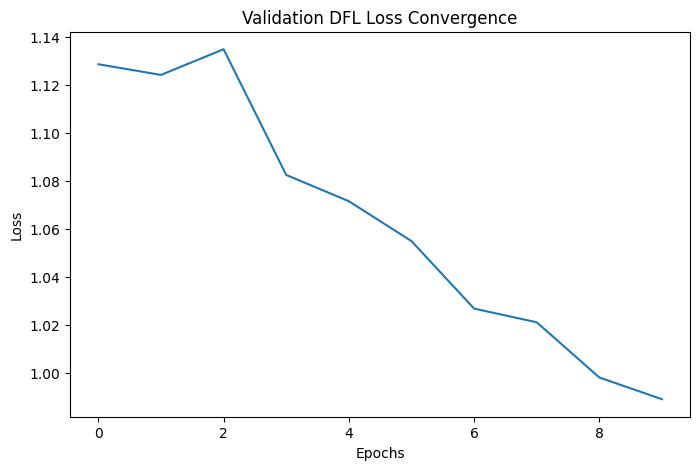

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

csv_path = "/content/runs/detect/train/results.csv"
df = pd.read_csv(csv_path)

val_losses = df["val/dfl_loss"]

plt.figure(figsize=(8, 5))
plt.plot(val_losses,label="Validation DFL Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Validation DFL Loss Convergence")
plt.show()


Predict solar panels using the trained model. Visualize the ground truth and predicted bounding boxes on 3-4 random samples from the test dataset. Use appropriate color schemes to differentiate between ground truth and predicted labels.


In [ ]:
import os
import random
import cv2

test_images_path="/content/split_dataset/test/images"
test_labels_path="/content/split_dataset/test/labels"

test_images=[]
for img_path in os.listdir(test_images_path):
    test_images.append(img_path)

test_labels=[]
for img_path in os.listdir(test_labels_path):
    test_labels.append(img_path)

# random.seed(42)
random_samples = random.sample(test_images, 3)  # Selecting 3 random images
print(random_samples)


['solarpanels_native_1__x0_8306_y0_12997_dxdy_416.jpg', 'solarpanels_native_2__x0_8484_y0_4036_dxdy_416.jpg', 'solarpanels_native_2__x0_8410_y0_3913_dxdy_416.jpg']



image 1/1 /content/split_dataset/test/images/solarpanels_native_1__x0_8306_y0_12997_dxdy_416.jpg: 640x640 5 solarpanel0s, 8.4ms
Speed: 4.0ms preprocess, 8.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


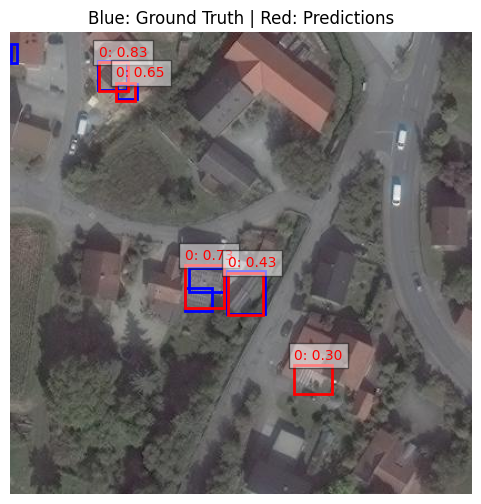


image 1/1 /content/split_dataset/test/images/solarpanels_native_2__x0_8484_y0_4036_dxdy_416.jpg: 640x640 19 solarpanel0s, 12.9ms
Speed: 4.4ms preprocess, 12.9ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)


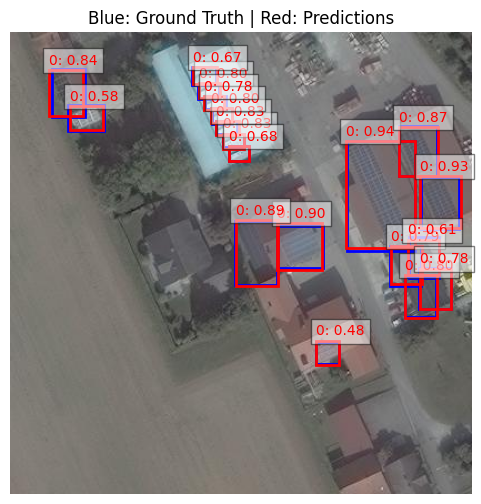


image 1/1 /content/split_dataset/test/images/solarpanels_native_2__x0_8410_y0_3913_dxdy_416.jpg: 640x640 14 solarpanel0s, 22.7ms
Speed: 9.9ms preprocess, 22.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


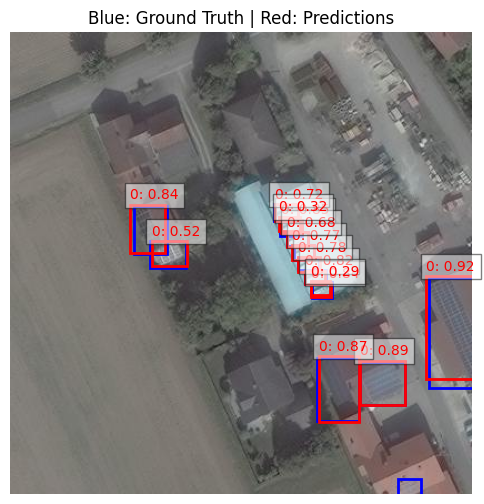

In [ ]:
import cv2

def plot_results(image_path, label_path, model):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    h, w = image.shape[0], image.shape[1]
    gt_boxes = []
    with open(label_path, "r") as f:
        for line in f:
            parts = line.strip().split()
            x_center, y_center, bbox_width, bbox_height = float(parts[1]), float(parts[2]), float(parts[3]), float(parts[4])
            x1 = ((x_center - bbox_width / 2) * w)
            y1 = ((y_center - bbox_height / 2) * h)
            x2 = ((x_center + bbox_width / 2) * w)
            y2 = ((y_center + bbox_height / 2) * h)
            gt_boxes.append((x1, y1, x2, y2))

    # model predictions
    results = model.predict(image_path)[0]

    # Extracting predicted bounding boxes, scores, and labels
    pred_boxes = results.boxes.xyxy.cpu().numpy()  # Bounding boxes
    pred_scores = results.boxes.conf.cpu().numpy()  # Confidence scores
    pred_labels = results.boxes.cls.cpu().numpy()   # Class labels

    plt.figure(figsize=(6, 6))
    plt.imshow(image)

    # Ploting ground truth boxes
    for x1, y1, x2, y2 in gt_boxes:
        plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
                                          edgecolor="blue", linewidth=2, fill=False))

    # Ploting predicted boxes
    for (x1, y1, x2, y2), score, label in zip(pred_boxes, pred_scores, pred_labels):
        plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
                                          edgecolor="red", linewidth=2, fill=False))
        plt.text(x1, y1 - 5, f"{label:.0f}: {score:.2f}", color="red", fontsize=10,
                 bbox=dict(facecolor="white", alpha=0.5))

    plt.title("Blue: Ground Truth | Red: Predictions")
    plt.axis("off")
    plt.show()

    return gt_boxes, pred_boxes, pred_scores, pred_labels

for img_path in random_samples:
    label_path=test_labels_path+"/"+img_path[:-4]+".txt"
    img_path=test_images_path+"/"+img_path
    gt_boxes, pred_boxes, pred_scores, pred_labels = plot_results(img_path, label_path, model)

In [ ]:
import torch
import cv2
import os

# Path prefix
prepath = "/content/image_chips_native_jpg"

# lists to store predictions
all_pred_boxes = []
all_pred_scores = []
all_pred_labels = []

for img_name in X_test:
    img_path = os.path.join(prepath, img_name)
    results = model(img_path)[0]

    # Extracting predictions
    pred_boxes = results.boxes.xyxy.cpu().numpy()  # Bounding boxes
    pred_scores = results.boxes.conf.cpu().numpy()  # Confidence scores
    pred_labels = results.boxes.cls.cpu().numpy()   # Class labels

    all_pred_boxes.append(pred_boxes)
    all_pred_scores.append(pred_scores)
    all_pred_labels.append(pred_labels)


image 1/1 /content/image_chips_native_jpg/solarpanels_native_3__x0_10105_y0_14149_dxdy_416.jpg: 640x640 3 solarpanel0s, 9.8ms
Speed: 4.8ms preprocess, 9.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/image_chips_native_jpg/solarpanels_native_1__x0_7918_y0_11152_dxdy_416.jpg: 640x640 5 solarpanel0s, 7.4ms
Speed: 2.4ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/image_chips_native_jpg/solarpanels_native_1__x0_5880_y0_13362_dxdy_416.jpg: 640x640 12 solarpanel0s, 7.4ms
Speed: 2.5ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/image_chips_native_jpg/solarpanels_native_2__x0_770_y0_10677_dxdy_416.jpg: 640x640 60 solarpanel0s, 7.4ms
Speed: 2.5ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/image_chips_native_jpg/solarpanels_native_1__x0_6627_y0_8649_dxdy_416.jpg: 640x640 6 solar

Compute mAP50 with supervision and compare with your implementation.

In [ ]:
csv_path = "/content/runs/detect/train/results.csv"

df = pd.read_csv(csv_path)

precision = df["metrics/precision(B)"]
recall = df["metrics/recall(B)"]

In [ ]:

# Compute AP50 using all 3 methods
ap_voc_11 = Average_Precision_Pascal_VOC_11(recall, precision)
ap_coco_101 = Average_Precision_COCO_101(recall, precision)
ap_auc = Average_Precision_AUC(recall, precision)

# Print Results
print("AP50 (Pascal VOC 11-point):",ap_voc_11)
print("AP50 (COCO 101-point):",ap_coco_101)
print("AP50 (AUC Method):",ap_auc)

AP50 (Pascal VOC 11-point): 0.26502272727272724
AP50 (COCO 101-point): 0.2884960396039604
AP50 (AUC Method): 0.10959788220000001


In [16]:
from supervision.metrics import MeanAveragePrecision


In [ ]:
def load_yolo_annotations(txt_file, img_shape):
    h, w = img_shape[:2]
    boxes, classes = [], []

    with open(txt_file, "r") as f:
        for line in f:
            parts = line.strip().split()
            c,xc, yc, bw, bh = float(parts[0]),float(parts[1]), float(parts[2]), float(parts[3]), float(parts[4])
            x_min, y_min = (xc - bw / 2) * w, (yc - bh / 2) * h
            x_max, y_max = (xc + bw / 2) * w, (yc + bh / 2) * h
            boxes.append([x_min, y_min, x_max, y_max])
            classes.append(int(c))

    return np.array(boxes), np.array(classes)

train_images_path="/content/split_dataset/train/images"
train_labels_path="/content/split_dataset/train/labels"
map_sv=0
# Load image and targets
for i in range(len(X_train)):
    image=cv2.imread(train_images_path+"/"+X_train[i])
    target_boxes,target_classes=load_yolo_annotations(train_labels_path+"/"+y_train[i], image.shape)
    targets=sv.Detections(xyxy=target_boxes, class_id=target_classes)
    # Get predictions
    results=model(image)[0]
    predictions=sv.Detections.from_ultralytics(results)

    # Compute mAP
    map_result=MeanAveragePrecision().update(predictions, targets).compute()
    map_sv+=map_result.map50_95
map_sv=map_sv/len(X_train)
print(map_sv)

Streaming output truncated to the last 5000 lines.
Speed: 3.6ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 solarpanel0, 7.4ms
Speed: 3.2ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 solarpanel0s, 7.4ms
Speed: 3.3ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 15 solarpanel0s, 7.4ms
Speed: 3.3ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 solarpanel0s, 7.3ms
Speed: 3.3ms preprocess, 7.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 13 solarpanel0s, 7.4ms
Speed: 3.7ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 27 solarpanel0s, 7.4ms
Speed: 3.6ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 solarpanel0s, 7.4ms
Speed: 3.7ms preprocess, 7.4ms infere

In [ ]:
print("mAP50 (Supervision):",map_sv)

mAP50 (Supervision): 0.5997698180949093



Create a table of Precision, Recall and F1-scores where rows are IoU thresholds [0.1, 0.3, 0.5, 0.7, 0.9] and columns are confidence thresholds [0.1, 0.3, 0.5, 0.7, 0.9] (Hint use supervision.metrics.ConfusionMatrix to get the confusion matrix and get TP, FP and FN from it to compute the P, R and F-1)


In [ ]:
import supervision as sv
from ultralytics import YOLO

dataset = sv.DetectionDataset.from_yolo(
    images_directory_path='/content/split_dataset/train/images',
    annotations_directory_path='/content/split_dataset/train/labels',
    data_yaml_path='/content/data.yaml'
)

In [ ]:
def call(image: np.ndarray) -> sv.Detections:
    result = model(image)[0]
    return sv.Detections.from_ultralytics(result)

In [ ]:
#IoU and Confidence thresholds
iou_thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]
conf_thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]

confusion_matrices = {}

for iou in iou_thresholds:
    for conf in conf_thresholds:
        cm = sv.ConfusionMatrix.benchmark(
          dataset=dataset,
          callback=call,
          conf_threshold=conf,
          iou_threshold=iou
        )
        confusion_matrices[(iou, conf)] = cm

Streaming output truncated to the last 5000 lines.
0: 640x640 4 solarpanel0s, 8.8ms
Speed: 5.5ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 solarpanel0s, 9.4ms
Speed: 4.9ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 13 solarpanel0s, 10.2ms
Speed: 5.1ms preprocess, 10.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 9 solarpanel0s, 9.3ms
Speed: 5.3ms preprocess, 9.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 solarpanel0s, 9.1ms
Speed: 5.2ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 16 solarpanel0s, 11.0ms
Speed: 4.9ms preprocess, 11.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 solarpanel0s, 9.5ms
Speed: 4.9ms preprocess, 9.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 solarpanel0s, 12 sol

In [50]:
# Initializing tables
precision_table = np.zeros((len(iou_thresholds), len(conf_thresholds)))
recall_table = np.zeros((len(iou_thresholds), len(conf_thresholds)))
f1_table = np.zeros((len(iou_thresholds), len(conf_thresholds)))

# Iterating over IoU and confidence thresholds
for i, iou in enumerate(iou_thresholds):
    for j, conf in enumerate(conf_thresholds):
        confusion_matrix = confusion_matrices[(iou, conf)].matrix

        TP = confusion_matrix[0, 0]
        FP = confusion_matrix[:, 0].sum() - TP
        FN = confusion_matrix[0, :].sum() - TP

        # Compute metrics
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        # Store values
        precision_table[i, j] = precision
        recall_table[i, j] = recall
        f1_table[i, j] = f1_score

# Convert to Pandas DataFrames for better readability
precision_df = pd.DataFrame(precision_table, index=iou_thresholds, columns=conf_thresholds)
recall_df = pd.DataFrame(recall_table, index=iou_thresholds, columns=conf_thresholds)
f1_df = pd.DataFrame(f1_table, index=iou_thresholds, columns=conf_thresholds)

# Print tables
print("\nPrecision Table:")
print(precision_df)

print("\nRecall Table:")
print(recall_df)

print("\nF1-Score Table:")
print(f1_df)


Precision Table:
          0.1       0.3       0.5       0.7       0.9
0.1  0.857069  0.885600  0.962192  0.992151  0.998734
0.3  0.856075  0.884652  0.961084  0.991485  0.998734
0.5  0.846699  0.874949  0.951909  0.983902  0.996021
0.7  0.804269  0.833115  0.919057  0.969866  0.994574
0.9  0.344884  0.359538  0.414311  0.489390  0.783686

Recall Table:
          0.1       0.3       0.5       0.7       0.9
0.1  0.930831  0.920882  0.856265  0.699906  0.259127
0.3  0.929751  0.919897  0.855279  0.699437  0.259127
0.5  0.919568  0.909808  0.847114  0.694087  0.258423
0.7  0.873487  0.866307  0.817879  0.684186  0.258048
0.9  0.374566  0.373862  0.368700  0.345237  0.203332

F1-Score Table:
          0.1       0.3       0.5       0.7       0.9
0.1  0.892428  0.902896  0.906143  0.820791  0.411491
0.3  0.891393  0.901930  0.905100  0.820240  0.411491
0.5  0.881630  0.892038  0.896459  0.813967  0.410373
0.7  0.837450  0.849387  0.865521  0.802355  0.409777
0.9  0.359113  0.366560  0.39017

In [51]:
# Initialize tables
precision_table = np.zeros((len(iou_thresholds), len(conf_thresholds)))
recall_table = np.zeros((len(iou_thresholds), len(conf_thresholds)))
f1_table = np.zeros((len(iou_thresholds), len(conf_thresholds)))

# Iterate over IoU and confidence thresholds
for i, iou in enumerate(iou_thresholds):
    for j, conf in enumerate(conf_thresholds):
        # Get confusion matrix for (iou, conf)
        confusion_matrix = confusion_matrices[(iou, conf)].matrix

        TP = confusion_matrix[1, 1]  # True Positives for solarpanel1
        FP = confusion_matrix[:, 1].sum() - TP  # False Positives for solarpanel1
        FN = confusion_matrix[1, :].sum() - TP  # False Negatives for solarpanel1

        # Compute metrics
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        # Store values
        precision_table[i, j] = precision
        recall_table[i, j] = recall
        f1_table[i, j] = f1_score

# Convert to Pandas DataFrames for better readability
precision_df = pd.DataFrame(precision_table, index=iou_thresholds, columns=conf_thresholds)
recall_df = pd.DataFrame(recall_table, index=iou_thresholds, columns=conf_thresholds)
f1_df = pd.DataFrame(f1_table, index=iou_thresholds, columns=conf_thresholds)

# Print tables
print("\nPrecision Table:")
print(precision_df)

print("\nRecall Table:")
print(recall_df)

print("\nF1-Score Table:")
print(f1_df)


Precision Table:
     0.1  0.3  0.5  0.7  0.9
0.1  0.0  0.0  0.0  0.0  0.0
0.3  0.0  0.0  0.0  0.0  0.0
0.5  0.0  0.0  0.0  0.0  0.0
0.7  0.0  0.0  0.0  0.0  0.0
0.9  0.0  0.0  0.0  0.0  0.0

Recall Table:
     0.1  0.3  0.5  0.7  0.9
0.1  0.0  0.0  0.0  0.0  0.0
0.3  0.0  0.0  0.0  0.0  0.0
0.5  0.0  0.0  0.0  0.0  0.0
0.7  0.0  0.0  0.0  0.0  0.0
0.9  0.0  0.0  0.0  0.0  0.0

F1-Score Table:
     0.1  0.3  0.5  0.7  0.9
0.1  0.0  0.0  0.0  0.0  0.0
0.3  0.0  0.0  0.0  0.0  0.0
0.5  0.0  0.0  0.0  0.0  0.0
0.7  0.0  0.0  0.0  0.0  0.0
0.9  0.0  0.0  0.0  0.0  0.0


In [52]:
# Initialize tables
precision_table = np.zeros((len(iou_thresholds), len(conf_thresholds)))
recall_table = np.zeros((len(iou_thresholds), len(conf_thresholds)))
f1_table = np.zeros((len(iou_thresholds), len(conf_thresholds)))

# Iterate over IoU and confidence thresholds
for i, iou in enumerate(iou_thresholds):
    for j, conf in enumerate(conf_thresholds):
        # Get confusion matrix for (iou, conf)
        confusion_matrix = confusion_matrices[(iou, conf)].matrix

        TP = confusion_matrix[2, 2]  # True Positives for solarpanel2
        FP = confusion_matrix[:, 2].sum() - TP  # False Positives for solarpanel2
        FN = confusion_matrix[2, :].sum() - TP  # False Negatives for solarpanel2

        # Compute metrics
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        # Store values
        precision_table[i, j] = precision
        recall_table[i, j] = recall
        f1_table[i, j] = f1_score

# Convert to Pandas DataFrames for better readability
precision_df = pd.DataFrame(precision_table, index=iou_thresholds, columns=conf_thresholds)
recall_df = pd.DataFrame(recall_table, index=iou_thresholds, columns=conf_thresholds)
f1_df = pd.DataFrame(f1_table, index=iou_thresholds, columns=conf_thresholds)

# Print tables
print("\nPrecision Table:")
print(precision_df)

print("\nRecall Table:")
print(recall_df)

print("\nF1-Score Table:")
print(f1_df)


Precision Table:
          0.1       0.3       0.5       0.7  0.9
0.1  0.462687  0.484375  0.863636  1.000000  1.0
0.3  0.462687  0.484375  0.863636  1.000000  1.0
0.5  0.462687  0.484375  0.863636  1.000000  1.0
0.7  0.447761  0.468750  0.818182  1.000000  1.0
0.9  0.194030  0.203125  0.363636  0.565217  1.0

Recall Table:
          0.1       0.3       0.5       0.7       0.9
0.1  0.190184  0.190184  0.233129  0.141104  0.006135
0.3  0.190184  0.190184  0.233129  0.141104  0.006135
0.5  0.190184  0.190184  0.233129  0.141104  0.006135
0.7  0.184049  0.184049  0.220859  0.141104  0.006135
0.9  0.079755  0.079755  0.098160  0.079755  0.006135

F1-Score Table:
          0.1       0.3       0.5       0.7       0.9
0.1  0.269565  0.273128  0.367150  0.247312  0.012195
0.3  0.269565  0.273128  0.367150  0.247312  0.012195
0.5  0.269565  0.273128  0.367150  0.247312  0.012195
0.7  0.260870  0.264317  0.347826  0.247312  0.012195
0.9  0.113043  0.114537  0.154589  0.139785  0.012195
